In [87]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [88]:
houseData = pd.read_csv('train.csv')

## Problem 1


### a) 

In [89]:
ca = pd.DataFrame(houseData['CentralAir'])

In [90]:
ca.describe()

,CentralAir
count,1460
unique,2
top,Y
freq,1365


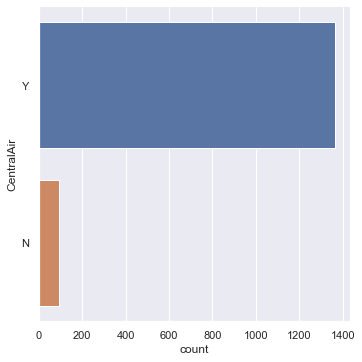

In [91]:
sb.catplot(y = "CentralAir", data = ca, kind = "count")

In [92]:
houseData["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [93]:
print("Y:N="+str(1365/95))

Y:N=14.368421052631579


### b)

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

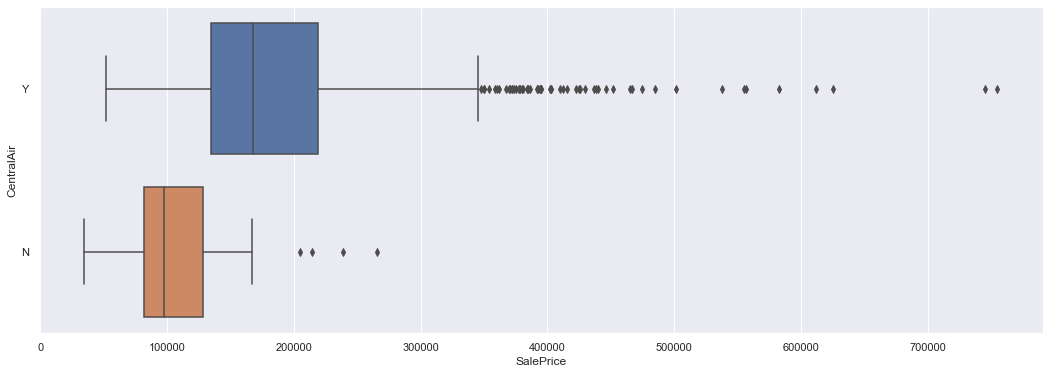

In [94]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

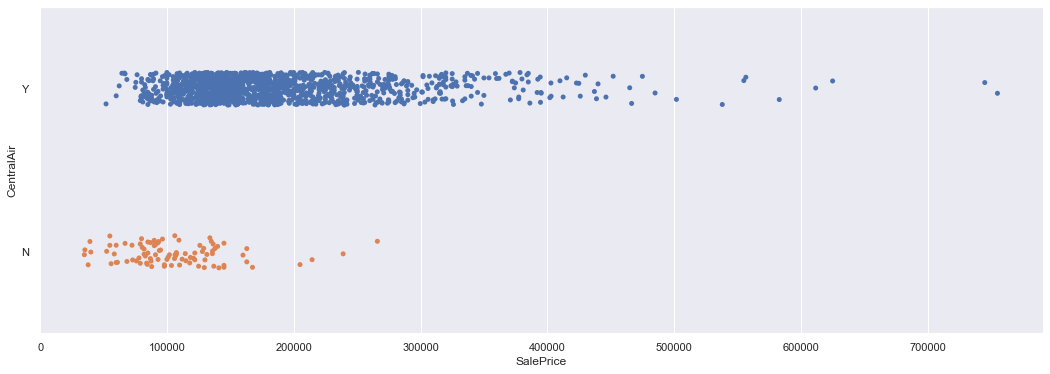

In [95]:
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

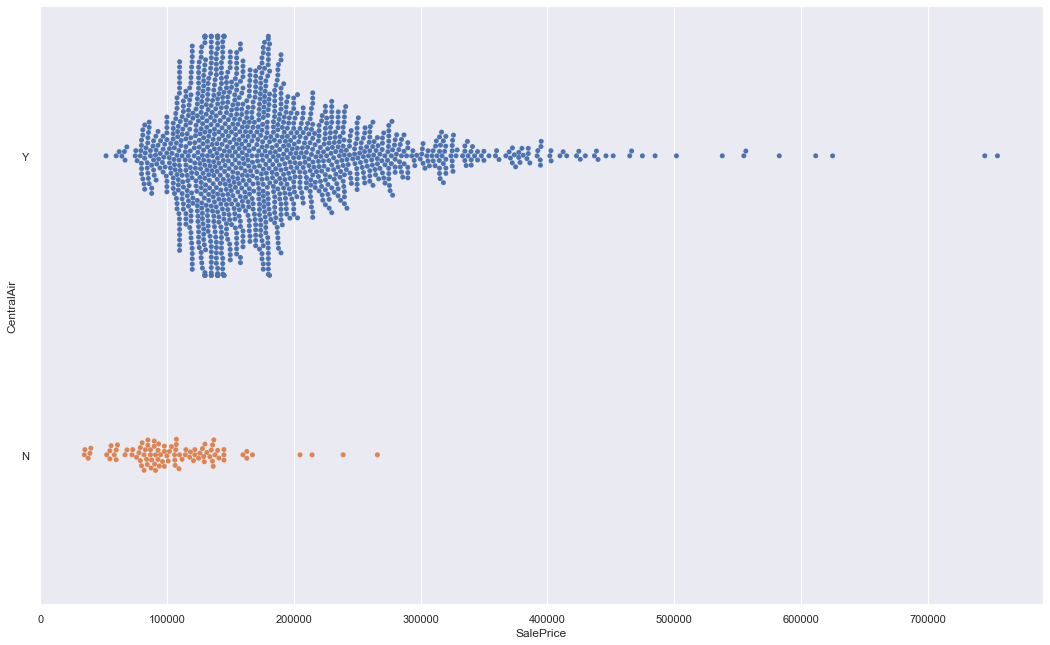

In [96]:
f = plt.figure(figsize=(18, 11))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")


### c)

In [97]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

### d)


In [98]:
sp = pd.DataFrame(houseData['SalePrice'])      

# Train Set : 1100 samples
sp_train = pd.DataFrame(sp[:1100])
ca_train = pd.DataFrame(ca[:1100])

# Test Set : 360 samples
sp_test = pd.DataFrame(sp[-360:])
ca_test = pd.DataFrame(ca[-360:])

# Check the sample sizes
print("Train Set :", ca_train.shape, sp_train.shape)
print("Test Set  :", ca_test.shape, sp_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### e)

In [99]:
dectree.fit(sp_train, ca_train)

DecisionTreeClassifier(max_depth=2)

### f)

[Text(418.5, 679.5, 'SalePrice <= 107450.0\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = N'),
 Text(209.25, 407.69999999999993, 'SalePrice <= 79250.0\ngini = 0.474\nsamples = 119\nvalue = [46, 73]\nclass = N'),
 Text(104.625, 135.89999999999998, 'gini = 0.444\nsamples = 24\nvalue = [16, 8]\nclass = Y'),
 Text(313.875, 135.89999999999998, 'gini = 0.432\nsamples = 95\nvalue = [30, 65]\nclass = N'),
 Text(627.75, 407.69999999999993, 'SalePrice <= 145125.0\ngini = 0.055\nsamples = 981\nvalue = [28, 953]\nclass = N'),
 Text(523.125, 135.89999999999998, 'gini = 0.128\nsamples = 305\nvalue = [21, 284]\nclass = N'),
 Text(732.375, 135.89999999999998, 'gini = 0.02\nsamples = 676\nvalue = [7, 669]\nclass = N')]

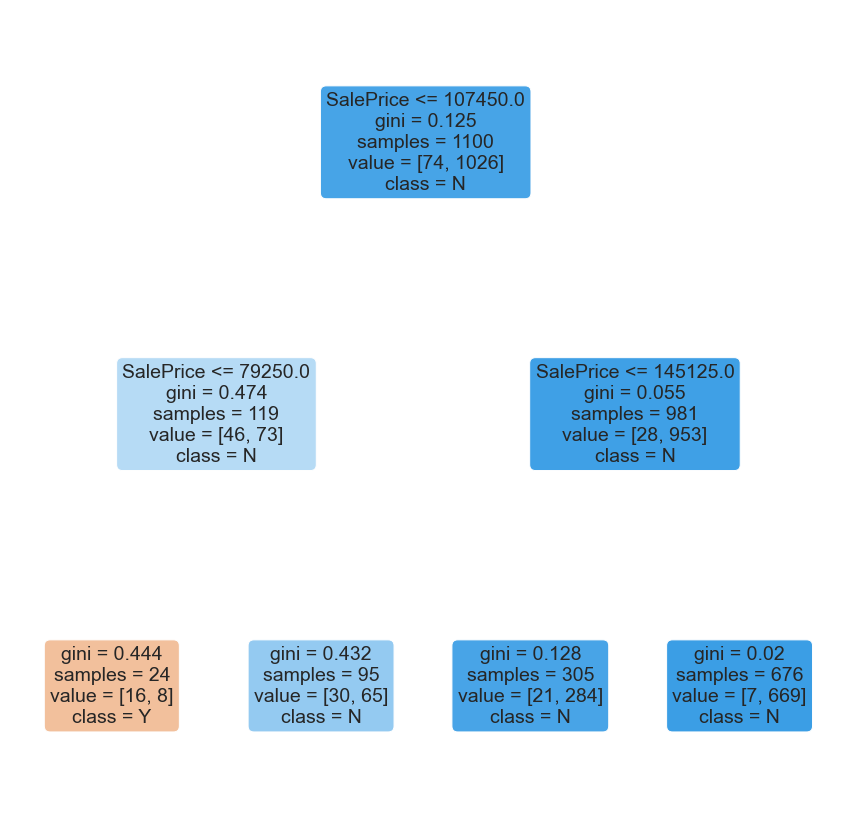

In [100]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Y","N"])

### g)

<AxesSubplot:>

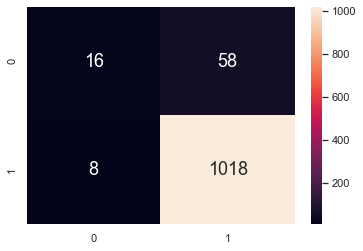

In [101]:
# Predict CentralAir corresponding to SalePrice (Train Data)
ca_train_pred = dectree.predict(sp_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_train, ca_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h)

In [102]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_train, ca_train))

Classification Accuracy 	: 0.94


#### Based on the two-way Confusion Matrix
####  True Positive Rate: 16
#### True Negative Rate: 1018
#### False Positive Rate: 58
#### False Negative Rate: 8
#### Classification Accuracy = (TP+TN)/1100 
####                                          = (1018+16)/1100 
####                                          = 0.94

### i)


<AxesSubplot:>

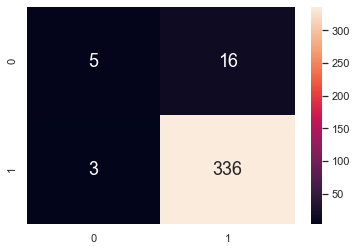

In [103]:
 # Predict CentralAir corresponding to SalePrice (Test Data)
ca_test_pred = dectree.predict(sp_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j)


In [104]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_test, ca_test))

Classification Accuracy 	: 0.9472222222222222


#### Based on the two-way Confusion Matrix
####  True Positive Rate: 5
#### True Negative Rate: 336
#### False Positive Rate: 16
#### False Negative Rate: 3
#### Classification Accuracy = (TP+TN)/360
####                                          = (5+336)/360
####                                          = 0.9472222222222222

## Problem 2

In [74]:
gla = pd.DataFrame(houseData['GrLivArea'])    

In [62]:
from sklearn.model_selection import train_test_split
gla_train, gla_test, ca_train, ca_test = train_test_split(gla, ca, test_size = 0.246)

print("Train Set :", gla_train.shape, ca_train.shape)
print("Test Set  :", gla_test.shape, ca_test.shape)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


[Text(418.5, 679.5, 'GrLivArea <= 803.5\ngini = 0.114\nsamples = 1100\nvalue = [67, 1033]\nclass = N'),
 Text(209.25, 407.69999999999993, 'GrLivArea <= 562.5\ngini = 0.47\nsamples = 37\nvalue = [14, 23]\nclass = N'),
 Text(104.625, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Y'),
 Text(313.875, 135.89999999999998, 'gini = 0.438\nsamples = 34\nvalue = [11, 23]\nclass = N'),
 Text(627.75, 407.69999999999993, 'GrLivArea <= 1111.5\ngini = 0.095\nsamples = 1063\nvalue = [53, 1010]\nclass = N'),
 Text(523.125, 135.89999999999998, 'gini = 0.177\nsamples = 214\nvalue = [21, 193]\nclass = N'),
 Text(732.375, 135.89999999999998, 'gini = 0.073\nsamples = 849\nvalue = [32, 817]\nclass = N')]

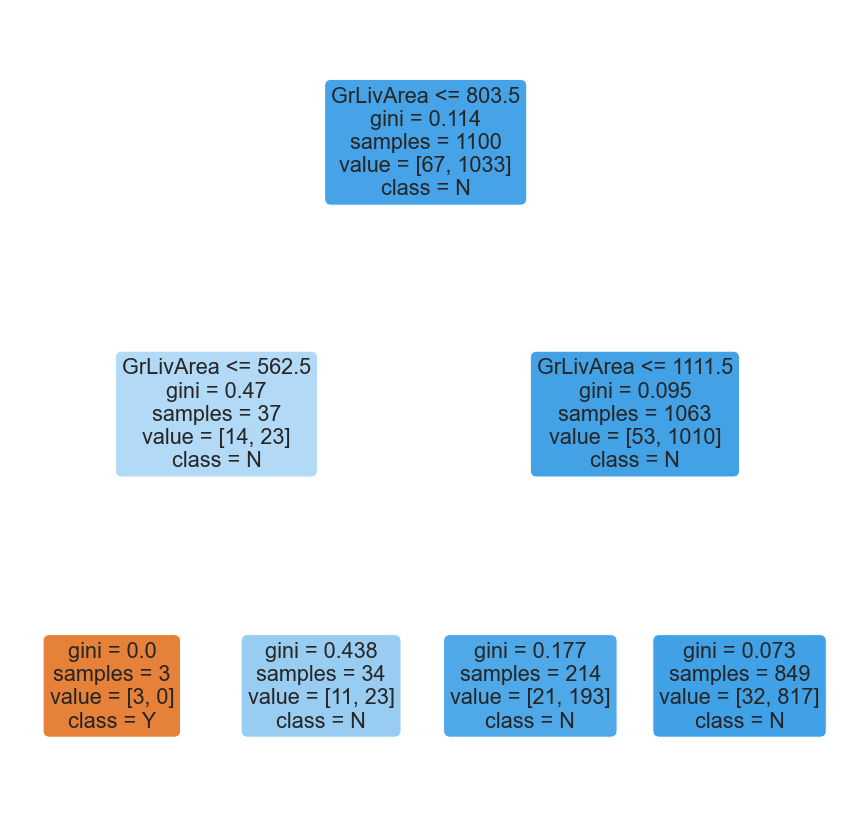

In [63]:
dectree.fit(gla_train, ca_train)
from sklearn.tree import plot_tree

f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["Y","N"])

Classification Accuracy 	: 0.9418181818181818


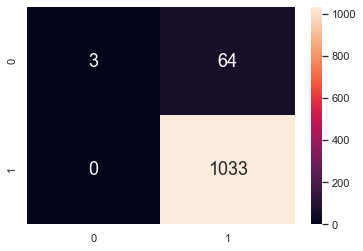

In [70]:
# Predict CentralAir corresponding to GrLivArea
ca_train_pred = dectree.predict(gla_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_train, ca_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(gla_train, ca_train))

#### Based on the two-way Confusion Matrix
####  True Positive Rate: 3
#### True Negative Rate: 1033
#### False Positive Rate: 64
#### False Negative Rate: 0
#### Classification Accuracy = (TP+TN)/1100 
####                                          = (1033+3)/1100 
####                                          = 0.9418181818181818

Classification Accuracy 	: 0.925


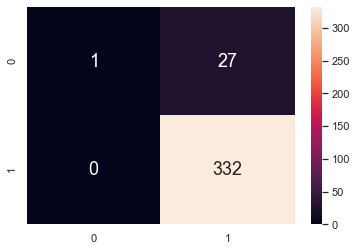

In [73]:
 # Predict CentralAir corresponding to SalePrice (Test Data)
ca_test_pred = dectree.predict(gla_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Classification Accuracy \t:", dectree.score(gla_test, ca_test))


#### Based on the two-way Confusion Matrix
####  True Positive Rate: 1
#### True Negative Rate: 332
#### False Positive Rate: 27
#### False Negative Rate: 0
#### Classification Accuracy = (TP+TN)/360
####                                          = (1+332)/360
####                                          = 0.925

In [75]:
oq = pd.DataFrame(houseData['OverallQual'])  
from sklearn.model_selection import train_test_split
oq_train, oq_test, ca_train, ca_test = train_test_split(oq, ca, test_size = 0.246)

print("Train Set :", oq_train.shape, ca_train.shape)
print("Test Set  :", oq_test.shape, ca_test.shape)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


[Text(418.5, 679.5, 'OverallQual <= 3.5\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = N'),
 Text(209.25, 407.69999999999993, 'OverallQual <= 2.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]\nclass = Y'),
 Text(104.625, 135.89999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Y'),
 Text(313.875, 135.89999999999998, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]\nclass = Y'),
 Text(627.75, 407.69999999999993, 'OverallQual <= 4.5\ngini = 0.103\nsamples = 1079\nvalue = [59, 1020]\nclass = N'),
 Text(523.125, 135.89999999999998, 'gini = 0.334\nsamples = 85\nvalue = [18, 67]\nclass = N'),
 Text(732.375, 135.89999999999998, 'gini = 0.079\nsamples = 994\nvalue = [41, 953]\nclass = N')]

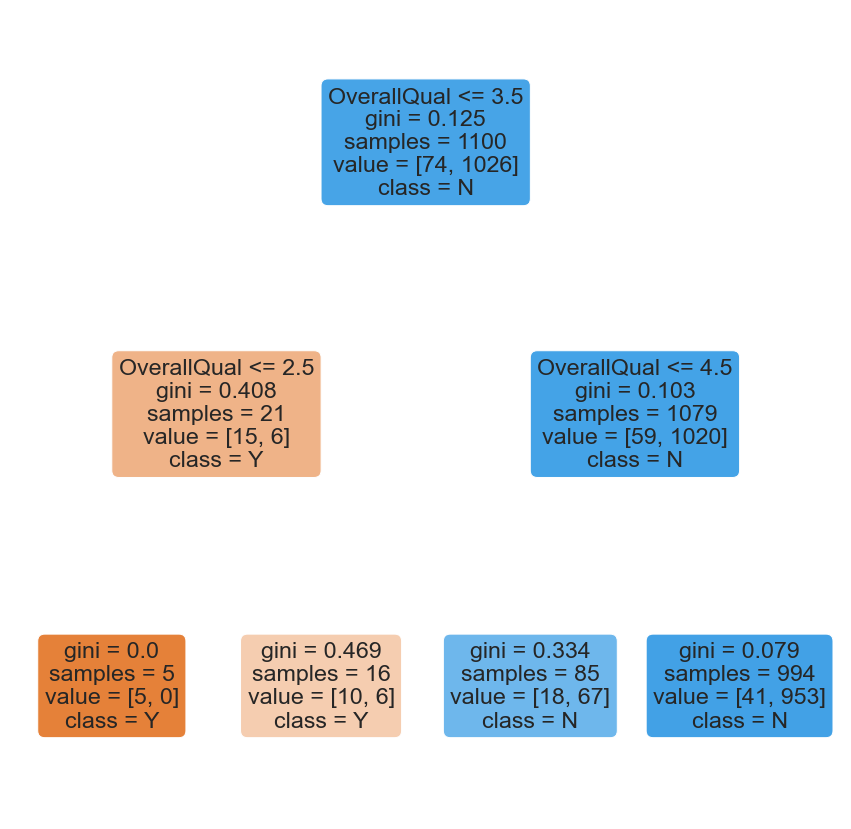

In [76]:
dectree.fit(oq_train, ca_train)
from sklearn.tree import plot_tree

f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["Y","N"])

Classification Accuracy 	: 0.9327272727272727


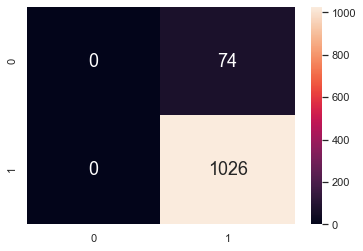

In [77]:
# Predict CentralAir corresponding to GrLivArea
ca_train_pred = dectree.predict(gla_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_train, ca_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(gla_train, ca_train))

#### Based on the two-way Confusion Matrix
####  True Positive Rate: 0
#### True Negative Rate: 1026
#### False Positive Rate: 74
#### False Negative Rate: 0
#### Classification Accuracy = (TP+TN)/1100 
####                                          = (1026+0)/1100 
####                                          = 0.9327272727272727

Classification Accuracy 	: 0.9361111111111111


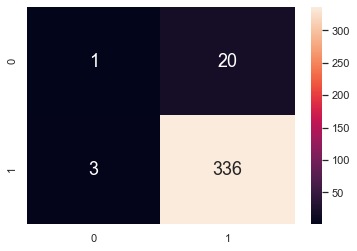

In [78]:
 # Predict CentralAir corresponding to SalePrice (Test Data)
ca_test_pred = dectree.predict(oq_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Classification Accuracy \t:", dectree.score(oq_test, ca_test))


#### Based on the two-way Confusion Matrix
####  True Positive Rate: 1
#### True Negative Rate: 336
#### False Positive Rate: 20
#### False Negative Rate: 3
#### Classification Accuracy = (TP+TN)/360
####                                          = (336+1)/360
####                                          = 0.9361111111111111

In [83]:
yb = pd.DataFrame(houseData['YearBuilt'])
from sklearn.model_selection import train_test_split
yb_train, yb_test, ca_train, ca_test = train_test_split(yb, ca, test_size = 0.246)

print("Train Set :", yb_train.shape, ca_train.shape)
print("Test Set  :", yb_test.shape, ca_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


[Text(418.5, 679.5, 'YearBuilt <= 1927.5\ngini = 0.127\nsamples = 1100\nvalue = [75, 1025]\nclass = N'),
 Text(209.25, 407.69999999999993, 'YearBuilt <= 1917.5\ngini = 0.459\nsamples = 126\nvalue = [45, 81]\nclass = N'),
 Text(104.625, 135.89999999999998, 'gini = 0.493\nsamples = 61\nvalue = [27, 34]\nclass = N'),
 Text(313.875, 135.89999999999998, 'gini = 0.4\nsamples = 65\nvalue = [18, 47]\nclass = N'),
 Text(627.75, 407.69999999999993, 'YearBuilt <= 1955.5\ngini = 0.06\nsamples = 974\nvalue = [30, 944]\nclass = N'),
 Text(523.125, 135.89999999999998, 'gini = 0.241\nsamples = 171\nvalue = [24, 147]\nclass = N'),
 Text(732.375, 135.89999999999998, 'gini = 0.015\nsamples = 803\nvalue = [6, 797]\nclass = N')]

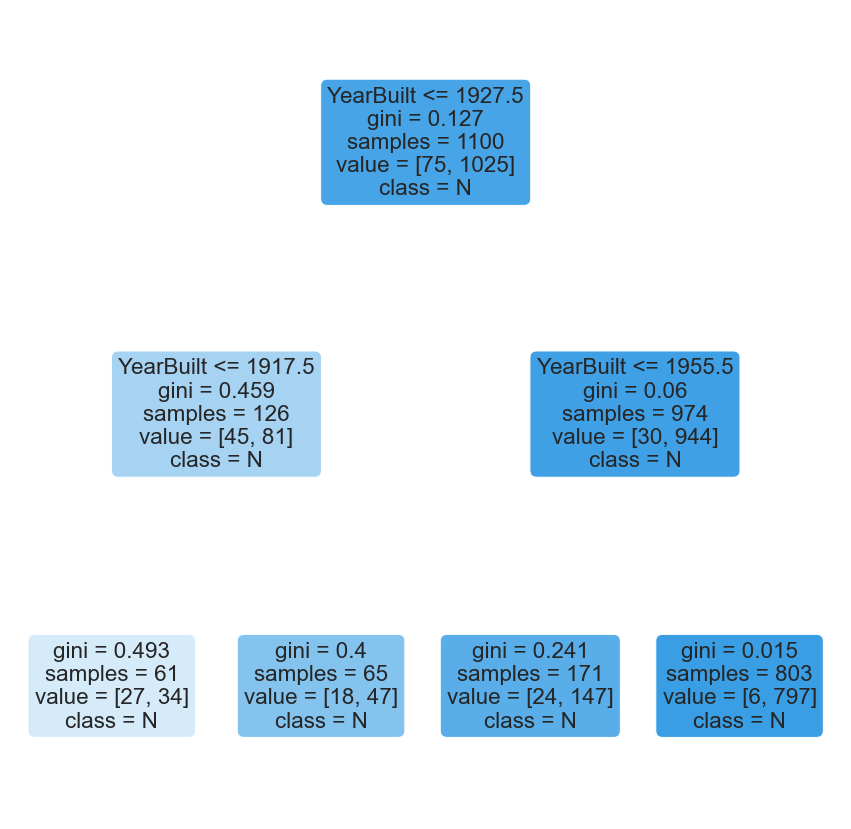

In [84]:
dectree.fit(yb_train, ca_train)
from sklearn.tree import plot_tree

f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["Y","N"])

Classification Accuracy 	: 0.9318181818181818


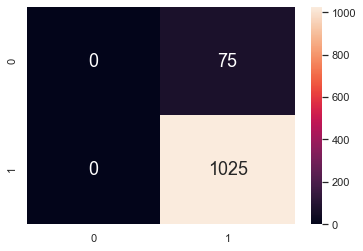

In [85]:
# Predict CentralAir corresponding to GrLivArea
ca_train_pred = dectree.predict(yb_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_train, ca_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(yb_train, ca_train))

#### Based on the two-way Confusion Matrix
####  True Positive Rate: 0
#### True Negative Rate: 1025
#### False Positive Rate: 75
#### False Negative Rate: 0
#### Classification Accuracy = (TP+TN)/1100 
####                                          = (1025+0)/1100 
####                                          = 0.9318181818181818


Classification Accuracy 	: 0.9444444444444444


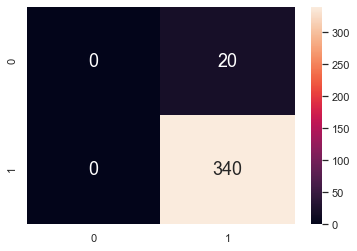

In [86]:
 # Predict CentralAir corresponding to SalePrice (Test Data)
ca_test_pred = dectree.predict(yb_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Classification Accuracy \t:", dectree.score(yb_test, ca_test))


#### Based on the two-way Confusion Matrix
####  True Positive Rate: 0
#### True Negative Rate: 339
#### False Positive Rate: 21
#### False Negative Rate: 0
#### Classification Accuracy = (TP+TN)/360
####                                          = (340+0)/360
####                                          = 0.9444444444444444

## Problem 3

#### Based on the accuracy measures of four of the variables which is SalePrice,GrLivArea, OverallQual, YearBuilt.
#### Sale Price get the highest classification accuracy which is 0.9472222222222222
#### Hence, Sale Price is the best to predict “CentralAir”.